In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import h5py
import io
import glob
import os
import pandas as pd
import numpy as np
from PIL import Image
#import yt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm

In [2]:
u_dens_cgs=3.12018613254236e-22#[g/cm^3]
u_time = 219132547200359 #[s]
u_dens=186.41626332196 # number density of H2
#u_eng=1.4240454908536e+51#[cm^2/s^2]
kBoltz = 1.380649e-16 # Boltzmann constant [cm^{2} g/s^{2}/K]
u_mass = 1.989e+39 #[g]
u_leng = 1.85417801326507e+20 #[cm] = 60pc
u_pres = u_mass/(u_leng*u_time*u_time) #cgs
u_velc = u_leng / u_time * 1e-5 # km/s

# Datastructure
- So far, 'Supernova.XX.h5' are put at '/mnt/home/khirashima/ceph/MPPX/SNsims/1Msun/'.

- XX is %02d integer from 0 to 24.

- Each dimension of tensors represents [ Physical quantities, batch, time, width, hight, depth ].

- $\mathrm{Physical quantities} \in \mathrm{Vx, Vy, Vz, density, pressure, t-coordinate, x-coordinate, y-coordinate, z-coordinate}$

# Density

In [12]:
!ls /mnt/home/khirashima/ceph/MPPX/SNsims/1Msun/

64		 Supernova-06.h5  Supernova-13.h5  Supernova-20.h5
Supernova-00.h5  Supernova-07.h5  Supernova-14.h5  Supernova-21.h5
Supernova-01.h5  Supernova-08.h5  Supernova-15.h5  Supernova-22.h5
Supernova-02.h5  Supernova-09.h5  Supernova-16.h5  Supernova-23.h5
Supernova-03.h5  Supernova-10.h5  Supernova-17.h5  Supernova-24.h5
Supernova-04.h5  Supernova-11.h5  Supernova-18.h5  chname.sh
Supernova-05.h5  Supernova-12.h5  Supernova-19.h5  valid


<KeysViewHDF5 ['GADGET', 'Vx', 'Vy', 'Vz', 'dense', 'density', 'moderate', 'pressure', 'sparse', 't-coordinate', 'temperature', 'x-coordinate', 'y-coordinate', 'z-coordinate']>
(20, 59, 64, 64, 64)


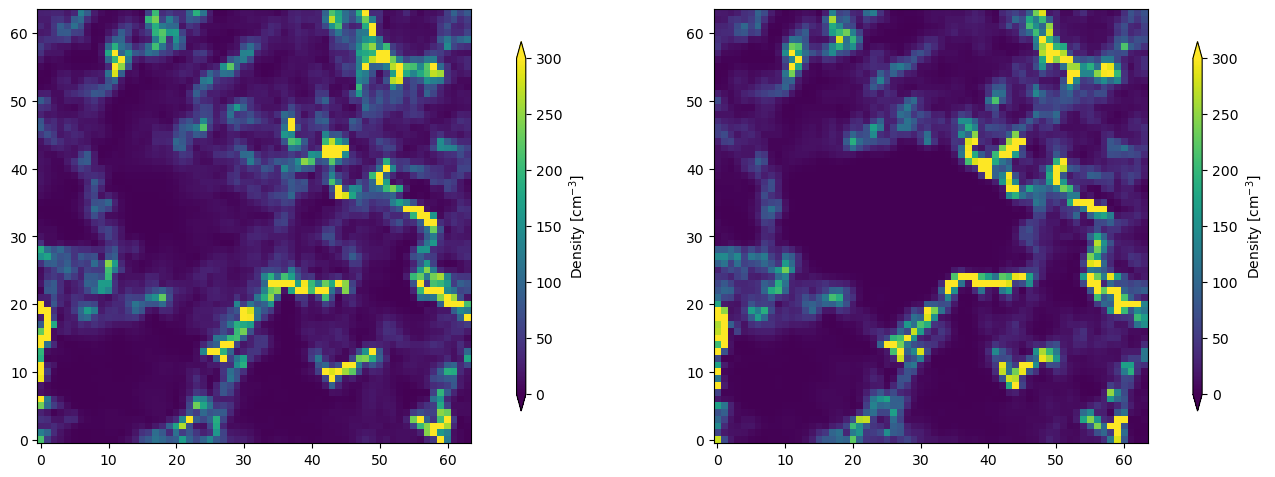

In [5]:
path_to_data= 'data/1Msun/' #'/mnt/home/khirashima/ceph/MPPX/SNsims/1Msun/'
h5_path = path_to_data+'Supernova.02.h5'
infh = h5py.File(h5_path, 'r')
print(infh.keys())
print(infh['density'].shape)

fig = plt.figure(figsize=(16, 8.0))

ax = plt.subplot(1, 2, 1)


plt.imshow(u_dens*infh['density'][10,0,:,:,32].T, vmin=0, vmax=300, origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Density [$\rm cm^{-3}$]')

ax=plt.subplot(1, 2, 2)
plt.imshow(u_dens*infh['density'][10,35,:,:,32].T, vmin=0, vmax=300, origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Density [$\rm cm^{-3}$]')
plt.show()

infh.close()

# Temperature

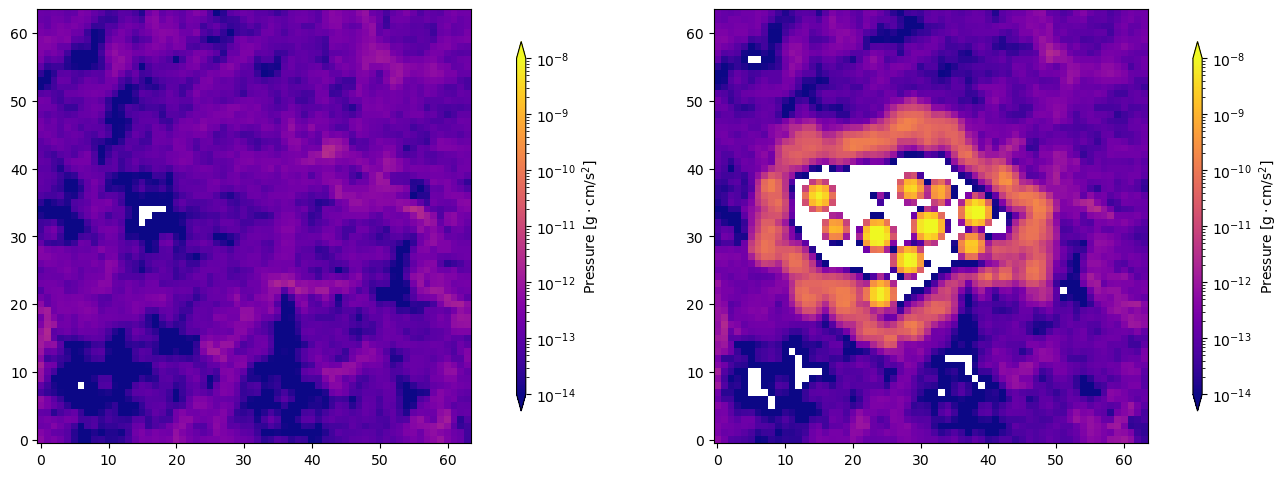

In [7]:
path_to_data='/mnt/home/khirashima/ceph/MPPX/SNsims/1Msun/'
h5_path = path_to_data+'Supernova-02.h5'
infh = h5py.File(h5_path, 'r')

log_norm = LogNorm(vmin=1e-14,vmax=1e-8)

fig = plt.figure(figsize=(16, 8.0))

ax = plt.subplot(1, 2, 1)


plt.imshow(u_pres*infh['pressure'][10,0,:,:,32].T, norm=log_norm, cmap=mpl.colormaps['plasma'], origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Pressure [$\rm g \cdot cm / s^{2}$]')

ax=plt.subplot(1, 2, 2)
plt.imshow(u_pres*infh['pressure'][10,35,:,:,32].T, norm=log_norm, cmap=mpl.colormaps['plasma'], origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Pressure [$\rm g \cdot cm / s^{2}$]')
plt.show()

infh.close()

# Velocity

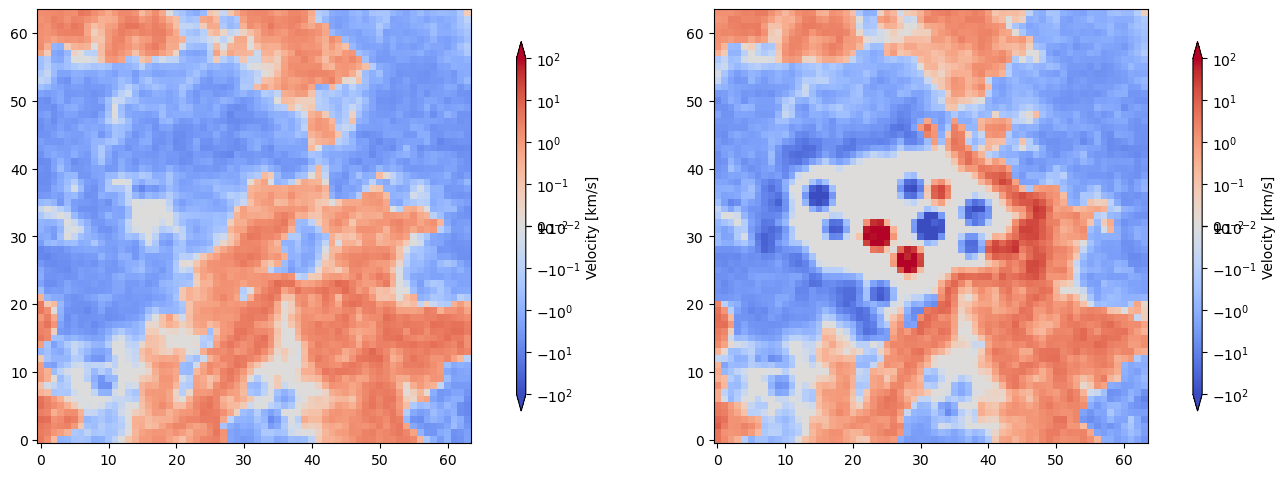

In [8]:
#path_to_data='./'
path_to_data='/mnt/home/khirashima/ceph/MPPX/SNsims/1Msun/'
h5_path = path_to_data+'Supernova-02.h5'
infh = h5py.File(h5_path, 'r')

abs_max=1e2
log_norm = SymLogNorm(linthresh=1e-2, linscale=1e-3, vmin=-abs_max, vmax=abs_max)


fig = plt.figure(figsize=(16, 8.0))

ax = plt.subplot(1, 2, 1)


plt.imshow(u_velc*infh['Vx'][10,0,:,:,32].T, norm=log_norm, cmap='coolwarm', origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Velocity [km/s]')

ax=plt.subplot(1, 2, 2)
plt.imshow(u_velc*infh['Vx'][10,35,:,:,32].T, norm=log_norm, cmap='coolwarm', origin='lower')
plt.colorbar(aspect=40, pad=0.08, shrink=0.6,
              extend='both', label=r'Velocity [km/s]')
plt.show()

infh.close()